# XGI in 15 minutes

Hello! If you are new to XGI you might want to check out the **XGI in 1 minute tutorial** for a quick introduction.

The starting point is always to import our Python library and other standard libraries, this is simply done using:




In [1]:
import xgi
import numpy as np
import matplotlib.pyplot as plt

## Uploading a dataset

In this tutorial we will construct a hypergraph describing real world data! With XGI we provide a companion data repository, [xgi-data](https://gitlab.com/complexgroupinteractions/xgi-data), with that repository you can easely load several datasets in standard format:

In [12]:
H_enron = xgi.load_xgi_data("email-enron")

This dataset, for example, has a corresponding [datasheet](https://gitlab.com/complexgroupinteractions/xgi-data-email-enron/-/blob/main/README.md) explaining its characteristics. The nodes (individuals) in this dataset contain associated email addresses and the edges (emails) contain associated timestamps. These attributes can be accessed by simply typing `H.nodes[id]` or `H.edges[id]` respectively.

In [13]:
print(f"The hypergraph has {H_enron.num_nodes} nodes and {H_enron.num_edges} edges")

The hypergraph has 148 nodes and 10885 edges


We can also print a summary of the hypergraph:

In [14]:
print(H_enron)

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


The dataset is completely formatted and has a corresponding [datasheet](https://gitlab.com/complexgroupinteractions/xgi-data-email-enron/-/blob/main/README.md) explaining its characteristics. You can access nodes and edges or their attributes in a very simple way:

In [7]:
print("The first 10 node IDs are:")
print(list(H_enron.nodes)[:10])
print("The first 10 edge IDs are:")
print(list(H_enron.edges)[:10])
print("The attributes of node '4' are")
print(H_enron.nodes["4"])
print("The attributes of edge '6' are")
print(H_enron.edges["6"])

The first 10 node IDs are:
['4', '1', '117', '129', '51', '41', '65', '107', '122', '29']
The first 10 edge IDs are:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
The attributes of node '4' are
{'name': 'robert.badeer@enron.com'}
The attributes of edge '6' are
{'timestamp': '2000-02-22T08:07:00'}


It is also possible to access nodes of edges in particular variable types, for example we can create a dictionary containing the edges of our hypergraph and their members:

In [11]:
edges_dictionary = H_enron.edges.members(dtype=dict)
print(list(edges_dictionary.items())[:5])

[('0', {'4', '1'}), ('1', {'129', '117', '1'}), ('2', {'51', '1'}), ('3', {'51', '1'}), ('4', {'41', '1'})]


## Check if a hypergraph is connected

You can check if your hypergraph is connect using the function:

In [15]:
xgi.is_connected(H_enron)

False

We can clean up this dataset to remove isolates, multi-edges, singletons, and to replace all IDs with integer IDs using the `cleanup` function:

In [16]:
H_enron_cleaned = H_enron.cleanup(
    multiedges=False, singletons=False, isolates=False, relabel=True, in_place=False
)

print(H_enron_cleaned)

Hypergraph named email-Enron with 143 nodes and 1514 hyperedges


And check that the hypergraph is now connected:

In [18]:
xgi.is_connected(H_enron_cleaned)

True

## Drawing

Visualization is crucial for understanding complex data structures. When dealing with large structures like this e-mail dataset the visualization can be cumberstome to interpret. To help you with that the XGI provides options for plotting hypergraph using the features of nodes and edges, for example:

<Axes: >

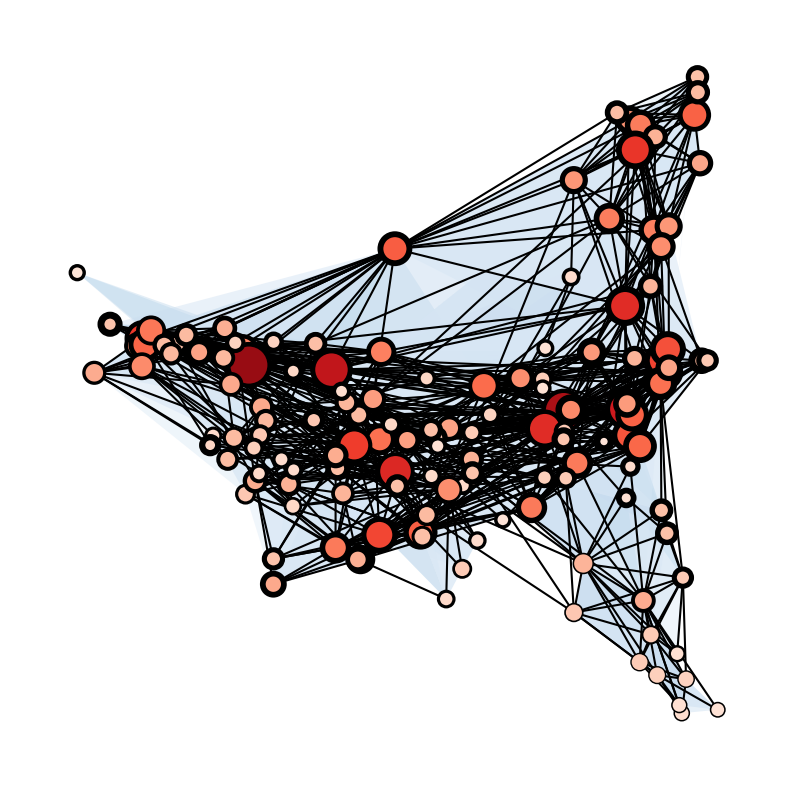

In [22]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(
    H_enron_cleaned,
    node_size=H_enron_cleaned.nodes.degree,
    node_lw=H_enron_cleaned.nodes.average_neighbor_degree,
    node_fc=H_enron_cleaned.nodes.degree,
    ax=ax,
)